In [3]:
import pickle
import numpy as np

ukbdir1 = '/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/UKB'
ukbdir2 = '/home/anton/Documents/Tulane/Research/ImageNomer/data/UKB2'

demo = pickle.load(open(f'{ukbdir2}/demographics.pkl', 'rb'))

rest = []
rest1 = []
restpc = []
work = []
work1 = []
workpc = []
sex = []

# print(list(demo.keys()))

for sub, s in demo['f_22001_0_0'].items():
    try:
        r = np.load(f'{ukbdir2}/conn/{sub}_task-20227-3_fc.npy')
        r1 = np.load(f'{ukbdir1}/Top1/{sub}_task-20227-3-top1_fc.npy')
        rp = np.load(f'{ukbdir2}/conn/{sub}_task-20227-3_pc.npy')
        w = np.load(f'{ukbdir2}/conn/{sub}_task-20249-3_fc.npy')
        w1 = np.load(f'{ukbdir1}/Top1/{sub}_task-20249-3-top1_fc.npy')
        wp = np.load(f'{ukbdir2}/conn/{sub}_task-20249-3_pc.npy')
        rest.append(r)
        rest1.append(r1)
        restpc.append(rp)
        work.append(w)
        work1.append(w1)
        workpc.append(wp)
        sex.append(s == 0)
    except:
        pass

rest = np.stack(rest)
rest1 = np.stack(rest1)
restpc = np.stack(restpc)
work = np.stack(work)
work1 = np.stack(work1)
workpc = np.stack(workpc)
sex = np.array(sex).astype('int')

print(rest.shape)

(2471, 34716)


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

losses = []

for _ in range(10):
    
    xtr1, xt1, xtr2, xt2, xtr3, xt3, xtr4, xt4, xtr5, xt5, xtr6, xt6, ytr, yt = train_test_split(
        rest, rest-rest1, restpc, work, work-work1, workpc, sex, stratify=sex, train_size=200)

    reg1 = LogisticRegression(C=1, max_iter=500).fit(xtr1, ytr)
    yhat1 = reg1.predict(xt1)
    reg2 = LogisticRegression(C=1, max_iter=500).fit(xtr2, ytr)
    yhat2 = reg2.predict(xt2)
    reg3 = LogisticRegression(C=1, max_iter=500).fit(xtr3, ytr)
    yhat3 = reg3.predict(xt3)
    reg4 = LogisticRegression(C=1, max_iter=500).fit(xtr4, ytr)
    yhat4 = reg4.predict(xt4)
    reg5 = LogisticRegression(C=1, max_iter=500).fit(xtr5, ytr)
    yhat5 = reg5.predict(xt5)
    reg6 = LogisticRegression(C=1, max_iter=500).fit(xtr6, ytr)
    yhat6 = reg6.predict(xt6)
    yhat = np.round((yhat1+yhat2+yhat3+yhat4+yhat5+yhat6)/6).astype('int')
    loss = np.mean(yt == yhat)
    null = np.mean(yt)
    if null < 0.5:
        null = 1-null
    print(loss, null)

    losses.append(loss)

print(np.mean(losses), np.std(losses))

0.7992073976221928 0.5055041831792162
0.8181417877586966 0.5055041831792162
0.829150154117129 0.5055041831792162
0.802289740202554 0.5055041831792162
0.793483047115808 0.5055041831792162
0.8181417877586966 0.5055041831792162
0.8071334214002642 0.5055041831792162
0.8031704095112285 0.5055041831792162
0.8066930867459269 0.5055041831792162
0.8243064729194187 0.5055041831792162
0.8101717305151915 0.011037302348905846


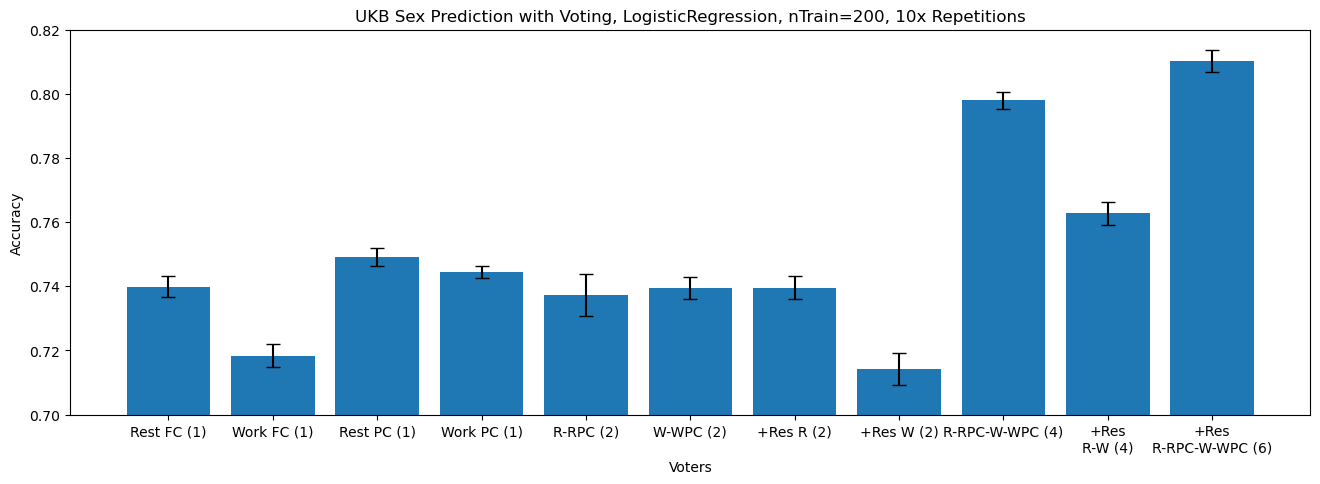

In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16,5))

hs = [0.7398502862,0.7183619551,0.749009247,0.7443857332,0.7371642448,0.7394980185,
      0.739453985,0.7142228093,0.7978863937,0.7627036548,0.8101717305]
errs = [0.003340047927,0.003699964174,0.002776553548,0.001810466334,0.006569241126,
        0.003463953509,0.003585443681,0.005108261575,0.002647872546,0.003607225143,0.003490301465]

ax.set_title('UKB Sex Prediction with Voting, LogisticRegression, nTrain=200, 10x Repetitions')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Voters')
ax.set_ylim([0.70,0.82])
ax.bar(np.arange(len(hs)), hs, yerr=errs,capsize=5)
ax.set_xticks(np.arange(len(hs)))
ax.set_xticklabels(['Rest FC (1)', 'Work FC (1)', 'Rest PC (1)', 'Work PC (1)', 'R-RPC (2)', 'W-WPC (2)', '+Res R (2)', '+Res W (2)', 
                    'R-RPC-W-WPC (4)', '+Res\nR-W (4)', '+Res\nR-RPC-W-WPC (6)']) 

fig.show()
    fig.savefig('/home/anton/Documents/Tulane/Research/Work/ContrastiveLearning/voting-ukb.pdf')